In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st

In [3]:
df_customers = pd.read_csv(r"C:\Users\mombo\OneDrive\Desktop\datas\Brazilian E-Commerce Public Dataset by Olist\olist_customers_dataset all.csv\olist_customers_dataset.csv")

df_order_items = pd.read_csv(r"C:\Users\mombo\OneDrive\Desktop\datas\Brazilian E-Commerce Public Dataset by Olist\olist_customers_dataset all.csv\olist_order_items_dataset.csv")

df_order_payments = pd.read_csv(r"C:\Users\mombo\OneDrive\Desktop\datas\Brazilian E-Commerce Public Dataset by Olist\olist_customers_dataset all.csv\olist_order_payments_dataset.csv")

df_orders = pd.read_csv(r"C:\Users\mombo\OneDrive\Desktop\datas\Brazilian E-Commerce Public Dataset by Olist\olist_customers_dataset all.csv\olist_orders_dataset.csv")

df_sellers = pd.read_csv(r"C:\Users\mombo\OneDrive\Desktop\datas\Brazilian E-Commerce Public Dataset by Olist\olist_customers_dataset all.csv\olist_sellers_dataset.csv")


In [4]:
display(df_customers.head(2))
display(df_order_items.head(2))
display(df_order_payments.head(2))
display(df_orders.head(2))
display(df_sellers.head(2))


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


DATA CLEANING 

In [ ]:
# df_customers
# df_order_items
# df_order_payments
# df_orders
# df_sellers

In [6]:
df_customers.shape

(99441, 5)

In [7]:
df_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [8]:
df_sellers.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [9]:
df_sellers.columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')

In [10]:
df_sellers["seller_state"].value_counts().head(2)



seller_state
SP    1849
PR     349
Name: count, dtype: int64

In [11]:
df_sellers["seller_state"].nunique()


23

In [12]:
df_sellers.shape

(3095, 4)

In [13]:
df_sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [14]:
df_sellers.duplicated().sum(),

(np.int64(0),)

In [15]:
df_sellers.head(2)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [16]:
df_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [17]:
df_sellers.to_csv('df_sellers.csv')

DATA AFTER SQL 

In [18]:

df_all = pd.read_csv(r"C:\Users\mombo\OneDrive\Desktop\IRONHACK - COURSE\SEM 9\PROJECT\Olist après SQL\ok\all.csv")


display(df_all.head(5))

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,customer_id.1,order_status,order_purchase_timestamp,order_approved_at,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_id.1,seller_zip_code_prefix,seller_city,seller_state
0,7887f43daaa91055f85b6dd23cccdfcb,1e5dec3847fa11b24069995161a7b95e,36770,cataguases,MG,009ac365164f8e06f59d18a08045f6c4,7887f43daaa91055f85b6dd23cccdfcb,delivered,2017-11-23 00:03:52,2017-11-23 00:11:24,...,1,35557c68a22ecebcf066e25ca2ddc144,f8db351d8c4c4c22c6835c19a46f01b0,2017-11-29 00:11:24,16.9,15.10,f8db351d8c4c4c22c6835c19a46f01b0,13324,salto,SP
1,5a3f73cc3e52ab64478beb5ce8756f4b,520a88dae0fd97b3230c7d36aea4196b,21073,rio de janeiro,RJ,0132158c30672a8c52997a2492613ec2,5a3f73cc3e52ab64478beb5ce8756f4b,delivered,2017-03-13 23:23:23,2017-03-13 23:23:23,...,1,e9eebb8e8ba0fadb9020f8ba1c003b48,620c87c171fb2a6dd6e8bb4dec959fc6,2017-03-19 23:23:23,399.9,13.41,620c87c171fb2a6dd6e8bb4dec959fc6,25645,petropolis,RJ
2,76c6370ab8b030109448c39db2b9e08c,81d59547135bb962c771484f86d08c11,31720,belo horizonte,MG,010e7dda85fff564e8b7076ae3928efb,76c6370ab8b030109448c39db2b9e08c,delivered,2017-11-27 14:26:40,2017-11-29 14:33:42,...,2,53759a2ecddad2bb87a079a1f1519f73,1f50f920176fa81dab994f9023523100,2017-12-05 14:31:24,49.0,17.67,1f50f920176fa81dab994f9023523100,15025,sao jose do rio preto,SP
3,76c6370ab8b030109448c39db2b9e08c,81d59547135bb962c771484f86d08c11,31720,belo horizonte,MG,010e7dda85fff564e8b7076ae3928efb,76c6370ab8b030109448c39db2b9e08c,delivered,2017-11-27 14:26:40,2017-11-29 14:33:42,...,1,53759a2ecddad2bb87a079a1f1519f73,1f50f920176fa81dab994f9023523100,2017-12-05 14:31:24,49.0,17.67,1f50f920176fa81dab994f9023523100,15025,sao jose do rio preto,SP
4,5c94f28f54aa13e14aaf67039511f318,55b66f38e36f20986ecd81eb16d5dad4,5634,sao paulo,SP,006df90050498994d670b40da4651d22,5c94f28f54aa13e14aaf67039511f318,delivered,2018-08-13 13:59:20,2018-08-13 14:15:12,...,1,85d619318aa201aca57171aabeed0048,cea729054f157f5870bdd321a958d994,2018-08-16 14:15:12,14.0,7.39,cea729054f157f5870bdd321a958d994,3161,sao paulo,SP


In [ ]:
#specify date columns
date_columns = ['order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date', 
                'order_delivered_customer_date', 'order_estimated_delivery_date','shipping_limit_date']

# Convert the specified columns to datetime format
for col in date_columns:
    df_all[col] = pd.to_datetime(df_all[col])

In [20]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115018 entries, 0 to 115017
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    115018 non-null  object        
 1   customer_unique_id             115018 non-null  object        
 2   customer_zip_code_prefix       115018 non-null  int64         
 3   customer_city                  115018 non-null  object        
 4   customer_state                 115018 non-null  object        
 5   order_id                       115018 non-null  object        
 6   customer_id.1                  115018 non-null  object        
 7   order_status                   115018 non-null  object        
 8   order_purchase_timestamp       115018 non-null  datetime64[ns]
 9   order_approved_at              115018 non-null  datetime64[ns]
 10  order_delivered_carrier_date   115018 non-null  datetime64[ns]
 11  

In [21]:
df_order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [22]:
df_all['payment_type'].value_counts()

payment_type
credit_card    84895
boleto         22347
voucher         6123
debit_card      1653
Name: count, dtype: int64

In [23]:
df_all.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'customer_id.1',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_id.1', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'order_id.2',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'seller_id.1', 'seller_zip_code_prefix',
       'seller_city', 'seller_state'],
      dtype='object')

ANALYSIS

I/  DELIVERY PERFORMANCE

In [24]:
# 1. Calculate the delivery variance (timedelta)
# Variance = (Estimated Date) - (Actual Date)
# If the result is POSITIVE: The delivery is EARLY.
# If the result is NEGATIVE: The delivery is LATE.


df_all['delivery_delay'] = (df_all['order_estimated_delivery_date'] - df_all['order_delivered_customer_date'])

#Convert the duration to days 

df_all['delivery_delay_days'] = (df_all['delivery_delay'].dt.total_seconds() / (24 * 3600)).round(2)

df_all.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,customer_id.1,order_status,order_purchase_timestamp,order_approved_at,...,seller_id,shipping_limit_date,price,freight_value,seller_id.1,seller_zip_code_prefix,seller_city,seller_state,delivery_delay,delivery_delay_days
0,7887f43daaa91055f85b6dd23cccdfcb,1e5dec3847fa11b24069995161a7b95e,36770,cataguases,MG,009ac365164f8e06f59d18a08045f6c4,7887f43daaa91055f85b6dd23cccdfcb,delivered,2017-11-23 00:03:52,2017-11-23 00:11:24,...,f8db351d8c4c4c22c6835c19a46f01b0,2017-11-29 00:11:24,16.9,15.10,f8db351d8c4c4c22c6835c19a46f01b0,13324,salto,SP,13 days 07:26:35,13.31
1,5a3f73cc3e52ab64478beb5ce8756f4b,520a88dae0fd97b3230c7d36aea4196b,21073,rio de janeiro,RJ,0132158c30672a8c52997a2492613ec2,5a3f73cc3e52ab64478beb5ce8756f4b,delivered,2017-03-13 23:23:23,2017-03-13 23:23:23,...,620c87c171fb2a6dd6e8bb4dec959fc6,2017-03-19 23:23:23,399.9,13.41,620c87c171fb2a6dd6e8bb4dec959fc6,25645,petropolis,RJ,14 days 14:32:06,14.61


In [25]:
df_all.shape 

(115018, 31)

In [26]:
# 1. Group by customer city and calculate the average difference (in days)
delay_par_ville = df_all.groupby('customer_city')['delivery_delay_days'].mean().round(2)

#2. Convert the series to a DataFrame for sorting and display
df_delay_par_ville = delay_par_ville.reset_index(name='average_delay_days')

df_delay_par_ville_trie = df_delay_par_ville.sort_values(by='average_delay_days', ascending=False)

df_delay_par_ville_trie .head(5)

,customer_city,average_delay_days
2008,juruti,59.47
2929,portalegre,43.68
219,apuarema,41.52
4079,xexeu,40.58
1916,japoata,40.53


In [27]:
# 1. Group by customer city and calculate the average difference (in days)
delay_par_ville = df_all.groupby('customer_city')['delivery_delay_days'].mean().round(2)

#2. Convert the series to a DataFrame for sorting and display
df_delay_par_ville = delay_par_ville.reset_index(name='average_delay_days')

#3. Sort by mean difference (from most ahead to most behind)
df_delay_par_ville_trie = df_delay_par_ville.sort_values(by='average_delay_days', ascending=False)

print("Trend by City/Customer (Average Difference in Days)--")

# Show the 3 Cities furthest AHEAD (Most conservative estimate)
print("\nTop 3 the most advanced cities:")
print(df_delay_par_ville_trie.head(5))

# Show the 3 cities with the most delays (least reliable estimate)
print("\nTop 3 Cities most behind:")
print(df_delay_par_ville_trie.tail(5))


Trend by City/Customer (Average Difference in Days)--

Top 3 the most advanced cities:
     customer_city  average_delay_days
2008        juruti               59.47
2929    portalegre               43.68
219       apuarema               41.52
4079         xexeu               40.58
1916       japoata               40.53

Top 3 Cities most behind:
           customer_city  average_delay_days
3665  serra dos dourados              -52.67
230                arace              -53.52
24     adhemar de barros              -73.01
789    capinzal do norte              -78.78
2526         novo brasil             -126.70


In [28]:
# We create a new column 'is_late' to indicate if the delivery was late or on time/early  in line with the estimated delivery date.
# Show the 3 Cities furthest AHEAD and 3 cities with the most delays in average

In [29]:
# Creating the binary variable 'is_late':
# TRUE (1) if delivery_delay_days <= 0 (On time or late)
# FALSE (0) if delivery_delay_days > 0 (Early)

df_all['is_late'] = np.where(
    df_all['delivery_delay_days'] <= 0,
    'Yes',#Later or on time
    'No'  #Early
)

df_all.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,customer_id.1,order_status,order_purchase_timestamp,order_approved_at,...,shipping_limit_date,price,freight_value,seller_id.1,seller_zip_code_prefix,seller_city,seller_state,delivery_delay,delivery_delay_days,is_late
0,7887f43daaa91055f85b6dd23cccdfcb,1e5dec3847fa11b24069995161a7b95e,36770,cataguases,MG,009ac365164f8e06f59d18a08045f6c4,7887f43daaa91055f85b6dd23cccdfcb,delivered,2017-11-23 00:03:52,2017-11-23 00:11:24,...,2017-11-29 00:11:24,16.9,15.10,f8db351d8c4c4c22c6835c19a46f01b0,13324,salto,SP,13 days 07:26:35,13.31,No
1,5a3f73cc3e52ab64478beb5ce8756f4b,520a88dae0fd97b3230c7d36aea4196b,21073,rio de janeiro,RJ,0132158c30672a8c52997a2492613ec2,5a3f73cc3e52ab64478beb5ce8756f4b,delivered,2017-03-13 23:23:23,2017-03-13 23:23:23,...,2017-03-19 23:23:23,399.9,13.41,620c87c171fb2a6dd6e8bb4dec959fc6,25645,petropolis,RJ,14 days 14:32:06,14.61,No


In [30]:
# Création of crosstab between customer_city and column "is_late"
contingency_table = pd.crosstab(
    df_all['customer_city'],
    df_all['is_late']
)
contingency_table


is_late,No,Yes
customer_city,,
abadia dos dourados,3,0
abadiania,1,0
abaete,10,1
abaetetuba,10,5
abaiara,1,1
...,...,...
xinguara,8,2
xique-xique,3,0
zacarias,1,1


In [31]:
contingency_table.to_csv('contingency_table.csv')

In [32]:
# 1. Check for independence on cities and delays by performing a Chisquare test

# H0: cities and delays  are independent

# H1: cities and delays  are dependent

# sl = 0.05

st.chi2_contingency(contingency_table)


Chi2ContingencyResult(statistic=np.float64(7981.117325349922), pvalue=np.float64(7.842855703673516e-255), dof=4084, expected_freq=array([[ 2.76436732,  0.23563268],
       [ 0.92145577,  0.07854423],
       [10.13601349,  0.86398651],
       ...,
       [ 1.84291154,  0.15708846],
       [ 4.60727886,  0.39272114],
       [ 1.84291154,  0.15708846]]))

In [33]:
# P-value is near to 0.
# We reject the nulle hypothesis. 
# We can say that there are a dependance betwin cities and delays.

Delivery time and delay

In [34]:
df_all.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,customer_id.1,order_status,order_purchase_timestamp,order_approved_at,...,shipping_limit_date,price,freight_value,seller_id.1,seller_zip_code_prefix,seller_city,seller_state,delivery_delay,delivery_delay_days,is_late
0,7887f43daaa91055f85b6dd23cccdfcb,1e5dec3847fa11b24069995161a7b95e,36770,cataguases,MG,009ac365164f8e06f59d18a08045f6c4,7887f43daaa91055f85b6dd23cccdfcb,delivered,2017-11-23 00:03:52,2017-11-23 00:11:24,...,2017-11-29 00:11:24,16.9,15.10,f8db351d8c4c4c22c6835c19a46f01b0,13324,salto,SP,13 days 07:26:35,13.31,No
1,5a3f73cc3e52ab64478beb5ce8756f4b,520a88dae0fd97b3230c7d36aea4196b,21073,rio de janeiro,RJ,0132158c30672a8c52997a2492613ec2,5a3f73cc3e52ab64478beb5ce8756f4b,delivered,2017-03-13 23:23:23,2017-03-13 23:23:23,...,2017-03-19 23:23:23,399.9,13.41,620c87c171fb2a6dd6e8bb4dec959fc6,25645,petropolis,RJ,14 days 14:32:06,14.61,No


In [35]:
df_all.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'customer_id.1',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_id.1', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'order_id.2',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'seller_id.1', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'delivery_delay', 'delivery_delay_days',
       'is_late'],
      dtype='object')

In [36]:
# 1. Calculate the delivery time delta
# Estimated = (order_estimated_delivery_date) - (order_approved_at)
# Actual = (order_delivered_customer_date) - (order_approved_at)
# 1. Calculate the delivery variance between estimated and actual delivery (timedelta)
# If the actual-estimated = POSITIVE: The delivery is LATE.
# # If the actual-estimated = NEGATIVE: The delivery is EARLY.


df_all['delivery_time_est'] = (df_all['order_estimated_delivery_date'] - df_all['order_approved_at'])

df_all['delivery_time_actual'] = (df_all['order_delivered_customer_date'] - df_all['order_approved_at'])

df_all['delivery_delays'] = (df_all['delivery_time_actual'] - df_all['delivery_time_est'] )

#Convert the duration to days 

df_all['delivery_delays_days'] = (df_all['delivery_delays'].dt.total_seconds() / (24 * 3600)).round(2)

df_all.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,customer_id.1,order_status,order_purchase_timestamp,order_approved_at,...,seller_zip_code_prefix,seller_city,seller_state,delivery_delay,delivery_delay_days,is_late,delivery_time_est,delivery_time_actual,delivery_delays,delivery_delays_days
0,7887f43daaa91055f85b6dd23cccdfcb,1e5dec3847fa11b24069995161a7b95e,36770,cataguases,MG,009ac365164f8e06f59d18a08045f6c4,7887f43daaa91055f85b6dd23cccdfcb,delivered,2017-11-23 00:03:52,2017-11-23 00:11:24,...,13324,salto,SP,13 days 07:26:35,13.31,No,19 days 23:48:36,6 days 16:22:01,-14 days +16:33:25,-13.31
1,5a3f73cc3e52ab64478beb5ce8756f4b,520a88dae0fd97b3230c7d36aea4196b,21073,rio de janeiro,RJ,0132158c30672a8c52997a2492613ec2,5a3f73cc3e52ab64478beb5ce8756f4b,delivered,2017-03-13 23:23:23,2017-03-13 23:23:23,...,25645,petropolis,RJ,14 days 14:32:06,14.61,No,16 days 00:36:37,1 days 10:04:31,-15 days +09:27:54,-14.61


In [37]:

df_all = df_all.drop(columns=['is_late'])

# Creating the binary variable 'is_late':
# TRUE (1) if delivery_delay_days <= 0  (Early or on time  )
# FALSE (0) if delivery_delay_days > 0 ( late)

df_all['late_or_no'] = np.where(
    df_all['delivery_delays_days'] > 0,
    'Yes',#Later or on time
    'No'  #Early
)

df_all.head(2)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,customer_id.1,order_status,order_purchase_timestamp,order_approved_at,...,seller_zip_code_prefix,seller_city,seller_state,delivery_delay,delivery_delay_days,delivery_time_est,delivery_time_actual,delivery_delays,delivery_delays_days,late_or_no
0,7887f43daaa91055f85b6dd23cccdfcb,1e5dec3847fa11b24069995161a7b95e,36770,cataguases,MG,009ac365164f8e06f59d18a08045f6c4,7887f43daaa91055f85b6dd23cccdfcb,delivered,2017-11-23 00:03:52,2017-11-23 00:11:24,...,13324,salto,SP,13 days 07:26:35,13.31,19 days 23:48:36,6 days 16:22:01,-14 days +16:33:25,-13.31,No
1,5a3f73cc3e52ab64478beb5ce8756f4b,520a88dae0fd97b3230c7d36aea4196b,21073,rio de janeiro,RJ,0132158c30672a8c52997a2492613ec2,5a3f73cc3e52ab64478beb5ce8756f4b,delivered,2017-03-13 23:23:23,2017-03-13 23:23:23,...,25645,petropolis,RJ,14 days 14:32:06,14.61,16 days 00:36:37,1 days 10:04:31,-15 days +09:27:54,-14.61,No


In [38]:
df_all.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'customer_id.1',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_id.1', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'order_id.2',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'seller_id.1', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'delivery_delay', 'delivery_delay_days',
       'delivery_time_est', 'delivery_time_actual', 'delivery_delays',
       'delivery_delays_days', 'late_or_no'],
      dtype='object')

II / Payment type analysis

In [39]:
# 1. Compter le nombre de commandes pour chaque type de paiement
compte_types = df_all['payment_type'].value_counts()

compte_types

payment_type
credit_card    84895
boleto         22347
voucher         6123
debit_card      1653
Name: count, dtype: int64

In [40]:
repartition_pourcentage = (
    df_all['payment_type'].value_counts(normalize=True) * 100
).round(2)

repartition_pourcentage

payment_type
credit_card    73.81
boleto         19.43
voucher         5.32
debit_card      1.44
Name: proportion, dtype: float64

In [41]:
#2. Calculer le pourcentage de commandes pour chaque type de paiement
# (normalize=True divise les comptes par le nombre total, multiplié par 100)

df_repartition = pd.DataFrame({
    'Number of order': compte_types,
    'Pourcentage': repartition_pourcentage.astype(str) + ' %'
})

df_repartition


,Number of order,Pourcentage
payment_type,,
credit_card,84895,73.81 %
boleto,22347,19.43 %
voucher,6123,5.32 %
debit_card,1653,1.44 %


In [42]:
df_repartition.to_csv('repartition_payment_type.csv')

In [43]:
contingency_payments = pd.crosstab(
    df_all['payment_type'],
    df_all['payment_installments']
)

contingency_payments

payment_installments,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,20,21,22,23,24
payment_type,,,,,,,,,,,,,,,,,,,,,
boleto,0,22347,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
credit_card,3,27223,13439,11497,7809,5901,4518,1772,4920,707,...,15,89,7,7,38,20,5,1,1,34
debit_card,0,1653,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
voucher,0,6123,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
contingency_payments.to_csv('repartition_payment_Installment.csv')

In [45]:
# we can see that the payment type  using the most is the  credit card 73.81%.
# also in the crosstab between payment type and payment installments we see that credit card is used the most in all installments.
# The large  use of credit card can be partly explained by the fact that consumers have this option of paying in installments.
# We can also say that the platform's Olist clients are predominantly banked.
# the other payment types are used much less frequently, but we can notice that boleto is the second most used payment type with 13.56% of use.which shows the progress of financial inclusion for all in the country

FINANCIAL ANALYSIS : AVERAGE ORDER VALUE (AOV)

In [46]:
# new column 'order_month' to extract the month and year from 'order_purchase_timestamp'

df_all['order_month'] = df_all['order_purchase_timestamp'].dt.to_period('M')

df_all.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,customer_id.1,order_status,order_purchase_timestamp,order_approved_at,...,seller_city,seller_state,delivery_delay,delivery_delay_days,delivery_time_est,delivery_time_actual,delivery_delays,delivery_delays_days,late_or_no,order_month
0,7887f43daaa91055f85b6dd23cccdfcb,1e5dec3847fa11b24069995161a7b95e,36770,cataguases,MG,009ac365164f8e06f59d18a08045f6c4,7887f43daaa91055f85b6dd23cccdfcb,delivered,2017-11-23 00:03:52,2017-11-23 00:11:24,...,salto,SP,13 days 07:26:35,13.31,19 days 23:48:36,6 days 16:22:01,-14 days +16:33:25,-13.31,No,2017-11
1,5a3f73cc3e52ab64478beb5ce8756f4b,520a88dae0fd97b3230c7d36aea4196b,21073,rio de janeiro,RJ,0132158c30672a8c52997a2492613ec2,5a3f73cc3e52ab64478beb5ce8756f4b,delivered,2017-03-13 23:23:23,2017-03-13 23:23:23,...,petropolis,RJ,14 days 14:32:06,14.61,16 days 00:36:37,1 days 10:04:31,-15 days +09:27:54,-14.61,No,2017-03


In [47]:
# revenue over the entire period

turnover = df_all['payment_value'].sum().round(2)

turnover

np.float64(19773394.7)

In [48]:
# number_of_order = total number of unique orders

number_of_order = df_all['order_id'].nunique()

number_of_order

96460

In [49]:

#2. Group and aggregate the data by month
aov_per_month = df_all.groupby('order_month').agg(turnover=('payment_value', 'sum'),         
    number_of_orders=('order_id', 'nunique')    
).reset_index()

# 3. Calcule of average order value (AOV) per month
aov_per_month['AOV'] = (aov_per_month['turnover'] / aov_per_month['number_of_orders']).round(2)


#4. Showing the results and sorting by date
print("--- Average Order Value (AOV) per month  ---")
print(aov_per_month[['order_month', 'AOV']].sort_values(by='order_month').head(30)) 

--- Average Order Value (AOV) per month  ---
   order_month     AOV
0      2016-10  231.82
1      2016-12   19.62
2      2017-01  235.80
3      2017-02  197.33
4      2017-03  198.64
5      2017-04  198.05
6      2017-05  197.78
7      2017-06  186.73
8      2017-07  184.94
9      2017-08  200.98
10     2017-09  240.08
11     2017-10  223.00
12     2017-11  212.48
13     2017-12  185.03
14     2018-01  194.38
15     2018-02  195.24
16     2018-03  204.98
17     2018-04  215.74
18     2018-05  219.39
19     2018-06  210.86
20     2018-07  212.27
21     2018-08  190.72


In [50]:
average_freight = df_all.groupby('order_month')['freight_value'].mean().round(2).reset_index()

# Rename the column
average_freight = average_freight.rename(columns={'freight_value': 'avg_freight_value'})

# 2. Joindre les frais de port moyens au DataFrame AOV
# Nous allons utiliser merge pour combiner le DataFrame aov_par_mois (avec AOV) et frais_port_moyens
df_mensuel_combine = pd.merge(
    aov_per_month, 
    average_freight, 
    on='order_month', 
    how='inner'
)

df_mensuel_combine

,order_month,turnover,number_of_orders,AOV,avg_freight_value
0,2016-10,62591.65,270,231.82,19.47
1,2016-12,19.62,1,19.62,8.72
2,2017-01,176376.56,748,235.80,17.27
3,2017-02,323815.95,1641,197.33,20.05
4,2017-03,505735.83,2546,198.64,19.09
5,2017-04,456108.32,2303,198.05,19.47
6,2017-05,701119.60,3545,197.78,19.27
7,2017-06,585400.98,3135,186.73,19.44
8,2017-07,716069.98,3872,184.94,19.31
9,2017-08,842689.94,4193,200.98,18.99


In [51]:
df_mensuel_combine.to_csv('aov_freight.csv')

In [52]:
# H0: The monthly AOV is not correlate with the average monthly freight value.
# H1: The monthly AOV is correlate  with the average monthly freight value.

# sl = 0.05

In [53]:
from scipy.stats import pearsonr

aov_serie = df_mensuel_combine['AOV']
freight_serie = df_mensuel_combine['avg_freight_value']

# Calculate the correlation (r) and the p-value (p)
correlation_r, p_value = pearsonr(aov_serie, freight_serie)

correlation_r, p_value


(np.float64(0.8267732510516572), np.float64(2.103142150888922e-06))

In [54]:
# we do reject the null hypothesis since the p-value is less than 0.05.
# We can conclude that there is a correlation between the average order value (AOV) and the average shipping costs.


# This result suggests that when average order value (AOV) increases (for example, during periods of high demand or promotions), it is not due to the purchase of more small items, 
# but rather to the purchase of:

# 1 - More expensive, heavy, or bulky items (which cost more to ship).
# 2- Multiple purchases where shipping costs are cumulative.
# 3- Faster delivery options for high-value items.

In [55]:
df_all.to_csv('df_all.csv')

In [56]:
df_all.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,customer_id.1,order_status,order_purchase_timestamp,order_approved_at,...,seller_city,seller_state,delivery_delay,delivery_delay_days,delivery_time_est,delivery_time_actual,delivery_delays,delivery_delays_days,late_or_no,order_month
0,7887f43daaa91055f85b6dd23cccdfcb,1e5dec3847fa11b24069995161a7b95e,36770,cataguases,MG,009ac365164f8e06f59d18a08045f6c4,7887f43daaa91055f85b6dd23cccdfcb,delivered,2017-11-23 00:03:52,2017-11-23 00:11:24,...,salto,SP,13 days 07:26:35,13.31,19 days 23:48:36,6 days 16:22:01,-14 days +16:33:25,-13.31,No,2017-11
1,5a3f73cc3e52ab64478beb5ce8756f4b,520a88dae0fd97b3230c7d36aea4196b,21073,rio de janeiro,RJ,0132158c30672a8c52997a2492613ec2,5a3f73cc3e52ab64478beb5ce8756f4b,delivered,2017-03-13 23:23:23,2017-03-13 23:23:23,...,petropolis,RJ,14 days 14:32:06,14.61,16 days 00:36:37,1 days 10:04:31,-15 days +09:27:54,-14.61,No,2017-03
2,76c6370ab8b030109448c39db2b9e08c,81d59547135bb962c771484f86d08c11,31720,belo horizonte,MG,010e7dda85fff564e8b7076ae3928efb,76c6370ab8b030109448c39db2b9e08c,delivered,2017-11-27 14:26:40,2017-11-29 14:33:42,...,sao jose do rio preto,SP,5 days 02:10:05,5.09,18 days 09:26:18,13 days 07:16:13,-6 days +21:49:55,-5.09,No,2017-11
3,76c6370ab8b030109448c39db2b9e08c,81d59547135bb962c771484f86d08c11,31720,belo horizonte,MG,010e7dda85fff564e8b7076ae3928efb,76c6370ab8b030109448c39db2b9e08c,delivered,2017-11-27 14:26:40,2017-11-29 14:33:42,...,sao jose do rio preto,SP,5 days 02:10:05,5.09,18 days 09:26:18,13 days 07:16:13,-6 days +21:49:55,-5.09,No,2017-11
4,5c94f28f54aa13e14aaf67039511f318,55b66f38e36f20986ecd81eb16d5dad4,5634,sao paulo,SP,006df90050498994d670b40da4651d22,5c94f28f54aa13e14aaf67039511f318,delivered,2018-08-13 13:59:20,2018-08-13 14:15:12,...,sao paulo,SP,1 days 01:41:24,1.07,3 days 09:44:48,2 days 08:03:24,-2 days +22:18:36,-1.07,No,2018-08


In [57]:
df_all.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'customer_id.1',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_id.1', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'order_id.2',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'seller_id.1', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'delivery_delay', 'delivery_delay_days',
       'delivery_time_est', 'delivery_time_actual', 'delivery_delays',
       'delivery_delays_days', 'late_or_no', 'order_month'],
      dtype='object')

MACHINE LEARNING - Delivery Time Prediction in Days

In [58]:
# 1. Calculate the delivery time delta
# Estimated = (order_estimated_delivery_date) - (order_approved_at)
# Actual = (order_delivered_customer_date) - (order_approved_at)
# 1. Calculate the delivery variance between estimated and actual delivery (timedelta)
# If the actual-estimated = POSITIVE: The delivery is LATE.
# # If the actual-estimated = NEGATIVE: The delivery is EARLY.


df_all['delivery_time_est'] = (df_all['order_estimated_delivery_date'] - df_all['order_approved_at'])

df_all['delivery_time_actual'] = (df_all['order_delivered_customer_date'] - df_all['order_approved_at'])

df_all['delivery_delays'] = (df_all['delivery_time_actual'] - df_all['delivery_time_est'] )

#Convert the duration to days 

df_all['delivery_delays_days'] = (df_all['delivery_delays'].dt.total_seconds() / (24 * 3600)).round(2)

df_all.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,customer_id.1,order_status,order_purchase_timestamp,order_approved_at,...,seller_city,seller_state,delivery_delay,delivery_delay_days,delivery_time_est,delivery_time_actual,delivery_delays,delivery_delays_days,late_or_no,order_month
0,7887f43daaa91055f85b6dd23cccdfcb,1e5dec3847fa11b24069995161a7b95e,36770,cataguases,MG,009ac365164f8e06f59d18a08045f6c4,7887f43daaa91055f85b6dd23cccdfcb,delivered,2017-11-23 00:03:52,2017-11-23 00:11:24,...,salto,SP,13 days 07:26:35,13.31,19 days 23:48:36,6 days 16:22:01,-14 days +16:33:25,-13.31,No,2017-11
1,5a3f73cc3e52ab64478beb5ce8756f4b,520a88dae0fd97b3230c7d36aea4196b,21073,rio de janeiro,RJ,0132158c30672a8c52997a2492613ec2,5a3f73cc3e52ab64478beb5ce8756f4b,delivered,2017-03-13 23:23:23,2017-03-13 23:23:23,...,petropolis,RJ,14 days 14:32:06,14.61,16 days 00:36:37,1 days 10:04:31,-15 days +09:27:54,-14.61,No,2017-03


In [59]:


# Creating the binary variable 'is_late':
# TRUE (1) if delivery_delay_days <= 0  (Early or on time  )
# FALSE (0) if delivery_delay_days > 0 ( late)

df_all['late_or_no'] = np.where(
    df_all['delivery_delays_days'] > 0,
    'Yes',#Later or on time
    'No'  #Early
)

df_all.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,customer_id.1,order_status,order_purchase_timestamp,order_approved_at,...,seller_city,seller_state,delivery_delay,delivery_delay_days,delivery_time_est,delivery_time_actual,delivery_delays,delivery_delays_days,late_or_no,order_month
0,7887f43daaa91055f85b6dd23cccdfcb,1e5dec3847fa11b24069995161a7b95e,36770,cataguases,MG,009ac365164f8e06f59d18a08045f6c4,7887f43daaa91055f85b6dd23cccdfcb,delivered,2017-11-23 00:03:52,2017-11-23 00:11:24,...,salto,SP,13 days 07:26:35,13.31,19 days 23:48:36,6 days 16:22:01,-14 days +16:33:25,-13.31,No,2017-11
1,5a3f73cc3e52ab64478beb5ce8756f4b,520a88dae0fd97b3230c7d36aea4196b,21073,rio de janeiro,RJ,0132158c30672a8c52997a2492613ec2,5a3f73cc3e52ab64478beb5ce8756f4b,delivered,2017-03-13 23:23:23,2017-03-13 23:23:23,...,petropolis,RJ,14 days 14:32:06,14.61,16 days 00:36:37,1 days 10:04:31,-15 days +09:27:54,-14.61,No,2017-03


In [60]:
df_all['order_status'].value_counts()

order_status
delivered    115011
canceled          7
Name: count, dtype: int64

In [61]:
#create a new column 'delivery_time_est_days' to convert 'delivery_time_est' to days

df_all['delivery_time_est_days'] = (df_all['delivery_time_est'].dt.total_seconds() / (24 * 3600)).round(2)

#create a new column 'delivery_time_actual_days' to convert 'delivery_time_actual' to days


#
df_all['delivery_time_actual_days'] = (df_all['delivery_time_actual'].dt.total_seconds() / (24 * 3600)).round(2)

df_all.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,customer_id.1,order_status,order_purchase_timestamp,order_approved_at,...,delivery_delay,delivery_delay_days,delivery_time_est,delivery_time_actual,delivery_delays,delivery_delays_days,late_or_no,order_month,delivery_time_est_days,delivery_time_actual_days
0,7887f43daaa91055f85b6dd23cccdfcb,1e5dec3847fa11b24069995161a7b95e,36770,cataguases,MG,009ac365164f8e06f59d18a08045f6c4,7887f43daaa91055f85b6dd23cccdfcb,delivered,2017-11-23 00:03:52,2017-11-23 00:11:24,...,13 days 07:26:35,13.31,19 days 23:48:36,6 days 16:22:01,-14 days +16:33:25,-13.31,No,2017-11,19.99,6.68
1,5a3f73cc3e52ab64478beb5ce8756f4b,520a88dae0fd97b3230c7d36aea4196b,21073,rio de janeiro,RJ,0132158c30672a8c52997a2492613ec2,5a3f73cc3e52ab64478beb5ce8756f4b,delivered,2017-03-13 23:23:23,2017-03-13 23:23:23,...,14 days 14:32:06,14.61,16 days 00:36:37,1 days 10:04:31,-15 days +09:27:54,-14.61,No,2017-03,16.03,1.42


In [62]:
df_all.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'customer_id.1',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_id.1', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'order_id.2',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'seller_id.1', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'delivery_delay', 'delivery_delay_days',
       'delivery_time_est', 'delivery_time_actual', 'delivery_delays',
       'delivery_delays_days', 'late_or_no', 'order_month',
       'delivery_time_est_days', 'delivery_time_actual_days'],
      dtype='object')

In [63]:
df_model = df_all.drop(columns = ['customer_id', 'customer_unique_id',
       'customer_city', 'order_id', 'customer_id.1',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_id.1', 'payment_sequential',
        'payment_value', 'order_id.2',
       'order_item_id', 'product_id', 'seller_id', 
        'seller_id.1', 
       'seller_city', 'delivery_delay', 'delivery_delay_days',
       'delivery_time_est', 'delivery_time_actual', 'delivery_delays',
       'delivery_delays_days', 'late_or_no', 'order_month'
       ])
df_model.head(2)

,customer_zip_code_prefix,customer_state,order_status,payment_type,payment_installments,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_state,delivery_time_est_days,delivery_time_actual_days
0,36770,MG,delivered,voucher,1,2017-11-29 00:11:24,16.9,15.10,13324,SP,19.99,6.68
1,21073,RJ,delivered,credit_card,8,2017-03-19 23:23:23,399.9,13.41,25645,RJ,16.03,1.42


In [64]:
# Filter the DataFrame for delivered orders only
df_model1 = df_model[df_model['order_status'] == 'delivered'].copy()

# change "shipping_limit_date" into months and years 
df_model1['shipping_limit_date'] = df_model1['shipping_limit_date'].dt.strftime('%Y-%m')


df_model1[['shipping_limit_year', 'shipping_limit_month']] = \
    df_model1['shipping_limit_date'].str.split('-', expand=True)

df_model1 = df_model1.drop(columns=['shipping_limit_date','seller_state' ])

df_model1.head(2)    

,customer_zip_code_prefix,customer_state,order_status,payment_type,payment_installments,price,freight_value,seller_zip_code_prefix,delivery_time_est_days,delivery_time_actual_days,shipping_limit_year,shipping_limit_month
0,36770,MG,delivered,voucher,1,16.9,15.10,13324,19.99,6.68,2017,11
1,21073,RJ,delivered,credit_card,8,399.9,13.41,25645,16.03,1.42,2017,03


In [65]:

# Columns to encode
columns_to_encode = ['customer_state', 'order_status', 'payment_type']

# Apply one-hot encoding
df_encoded = pd.get_dummies(
    df_model1,
    columns=columns_to_encode,
    drop_first=True
)

df_encoded = df_encoded.astype(int)


In [66]:
#Assign the stored column to the end of the DataFrame
target_column_data = df_encoded.pop('delivery_time_actual_days')

df_encoded['delivery_time_actual_days'] = target_column_data

# Filter to keep only positive values ​​on delivery_time_actual_days

df_olist_ml = df_encoded[df_encoded['delivery_time_actual_days'] >= 0].copy()

df_olist_ml.head(2) 

,customer_zip_code_prefix,payment_installments,price,freight_value,seller_zip_code_prefix,delivery_time_est_days,shipping_limit_year,shipping_limit_month,customer_state_AL,customer_state_AM,...,customer_state_RR,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,delivery_time_actual_days
0,36770,1,16,15,13324,19,2017,11,0,0,...,0,0,0,0,0,0,0,0,1,6
1,21073,8,399,13,25645,16,2017,3,0,0,...,0,0,0,0,0,0,1,0,0,1


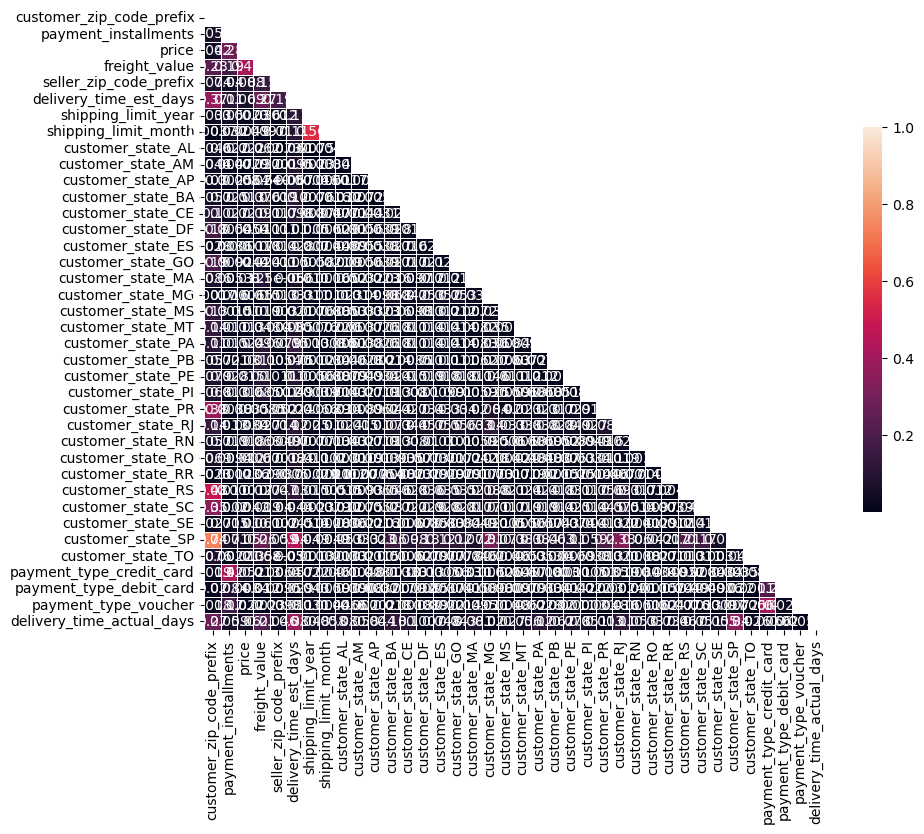

In [67]:
corr=np.abs(df_olist_ml.corr(method="pearson"))

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

## Regression

First we need to distinguish from features and target

In [68]:
features = df_olist_ml.drop(columns = ["delivery_time_actual_days"])
target = df_olist_ml["delivery_time_actual_days"]

In [69]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [70]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

In [71]:
normalizer = MinMaxScaler()

normalizer.fit(X_train)

MinMaxScaler()

In [72]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [73]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)

X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)


display(X_train_norm.head(2))
display(X_test_norm.head(2))

,customer_zip_code_prefix,payment_installments,price,freight_value,seller_zip_code_prefix,delivery_time_est_days,shipping_limit_year,shipping_limit_month,customer_state_AL,customer_state_AM,...,customer_state_RO,customer_state_RR,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,0.043929,0.250000,0.008463,0.024000,0.034812,0.090909,0.25,0.909091,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.035766,0.041667,0.021529,0.037333,0.114718,0.110390,0.25,0.909091,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


,customer_zip_code_prefix,payment_installments,price,freight_value,seller_zip_code_prefix,delivery_time_est_days,shipping_limit_year,shipping_limit_month,customer_state_AL,customer_state_AM,...,customer_state_RO,customer_state_RR,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,0.350364,0.083333,0.004306,0.042667,0.141184,0.136364,0.25,0.727273,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.657648,0.041667,0.015590,0.037333,0.211073,0.220779,0.50,0.363636,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
display(y_train.head(2))
display(y_test.head(2))

80696     4
39708    10
Name: delivery_time_actual_days, dtype: int64

105161     8
43270     19
Name: delivery_time_actual_days, dtype: int64

In [75]:
knn = KNeighborsRegressor(n_neighbors=10)

In [76]:
knn.fit(X_train_norm, y_train)

KNeighborsRegressor(n_neighbors=10)

In [77]:
knn.score(X_test_norm, y_test)

0.30617103317543126

In [78]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score


pred = knn.predict(X_test_norm)


print("RMSE--->", root_mean_squared_error(y_test, pred))
print("MAE--->", mean_absolute_error(y_test, pred))
print("R2 score---->", r2_score(y_test, pred))

RMSE---> 7.748258703579478
MAE---> 4.7775342465753425
R2 score----> 0.30617103317543126


In [79]:
y_test.values

array([ 8, 19, 13, ..., 20,  9,  6])

In [80]:
pred

array([10.6, 24.6,  9.4, ...,  9.3, 14.1,  9.2])

Now we perform the division between Train and Test, we will reserve 20% of our data to Test.

DECISION TREE

In [81]:
tree = DecisionTreeRegressor(max_depth=10)

- Training the model

In [82]:
tree.fit(X_train_norm, y_train)

DecisionTreeRegressor(max_depth=10)

In [83]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score


pred = tree.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", root_mean_squared_error(y_test, pred))
print("R2 score", tree.score(X_test_norm, y_test))

MAE 4.8503161562903525
RMSE 8.159359634220161
R2 score 0.23059261042205736


In [84]:
y_test.values

array([ 8, 19, 13, ..., 20,  9,  6])

In [85]:
pred

array([10.43574594, 13.18638439,  8.14016736, ...,  9.38369305,
       13.18638439, 10.29378531])